# EDA Assignment

---

**EDA Project Instructions**

1. **Read Each Task Carefully**: Understand each task’s requirements before starting your analysis.

2. **Perform the Analysis**: For each task, you’ll find a description in the code cell. Write your code directly in the provided cells to perform the necessary analysis using the Heart Attack dataset.

3. **Visualize and Interpret**: Create visualizations and interpret the results as needed. Ensure your analysis addresses the specific questions and insights required.

4. **Complete All Tasks**: Make sure you address each task. Each task is designed to test different aspects of data analysis and visualization.

5. **Download Your Notebook**: After completing and reviewing your analysis, download your notebook file (.ipynb) by selecting `File > Download > Download .ipynb`.

6. **Submit Your Work**: Upload the downloaded `.ipynb` file to the designated platform for submission.

7. **Verify Your Submission**: Ensure that you have submitted the correct file and that it is not corrupted. If needed, resubmit the file.

Good luck, and happy analyzing!

---

## Dataset Information :
<ul style= "color:#137667;
            font-size:12px;">
    <li> age : age of the patient</li>
    <li> sex : sex of the patient (0 - Male, 1 - Female)</li>
    <li> cp : Chest Pain type</li>
    0: typical angina <br>
    1: atypical angina <br>
    2: non-anginal pain <br>
    3: asymptomatic <br>
    <li> trtbps : resting blood pressure (in mm Hg)</li>
    <li> fbs : (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)</li>
    <li> chol : cholestoral in mg/dl fetched via BMI sensor</li>
    <li> rest_ecg : resting electrocardiographic results</li>
  0:normal <br>
  1:having ST-T wave abnormality(T wave inversions and/or ST elevation or depression of>0.05 mV) <br>
  2:showing probable or definite left ventricular hypertrophy by Estes' criteria
    <li> thalachh : maximum heart rate achieved</li>
    <li> exng : exercise induced angina (1 = yes; 0 = no)</li>
    <li> oldpeak : Previous peak</li>
    <li> slp : ST/HR Slope </li>
    <li> caa : number of major vessels (0-4)</li>
    <li> thall : Thal rate</li>
    <li> output : 0= less chance of heart attack 1= more chance of heart attack</li>
</ul>

In [5]:
# Run this code cell for initial setup
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

mpl.style.use('ggplot')

import warnings
warnings.filterwarnings('ignore')

# load the data to colab
data = pd.read_csv('https://new-assets.ccbp.in/frontend/content/aiml/classical-ml/heart_dataset.csv')
data.head(10)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233.0,1,0,150.0,0.0,2.3,0,0,1,1
1,37,1,2,130,250.0,0,1,187.0,0.0,3.5,0,0,2,1
2,41,0,1,130,204.0,0,0,172.0,0.0,1.4,2,0,2,1
3,56,1,1,120,236.0,0,1,178.0,0.0,0.8,2,0,2,1
4,57,0,0,120,354.0,0,1,163.0,1.0,0.6,2,0,2,1
5,57,1,0,140,192.0,0,1,148.0,0.0,0.4,1,0,1,1
6,56,0,1,140,294.0,0,0,153.0,0.0,1.3,1,0,2,1
7,44,1,1,120,263.0,0,1,173.0,0.0,0.0,2,0,3,1
8,52,1,2,172,199.0,1,1,162.0,0.0,0.5,2,0,3,1
9,57,1,2,150,168.0,0,1,174.0,0.0,1.6,2,0,2,1


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 324 entries, 0 to 323
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       324 non-null    int64  
 1   sex       324 non-null    int64  
 2   cp        324 non-null    int64  
 3   trtbps    324 non-null    int64  
 4   chol      321 non-null    float64
 5   fbs       324 non-null    int64  
 6   restecg   324 non-null    int64  
 7   thalachh  320 non-null    float64
 8   exng      321 non-null    float64
 9   oldpeak   324 non-null    float64
 10  slp       324 non-null    int64  
 11  caa       324 non-null    int64  
 12  thall     324 non-null    int64  
 13  output    324 non-null    int64  
dtypes: float64(4), int64(10)
memory usage: 35.6 KB


---
---
**1. Check does patients with exercise-induced angina (exng) at higher risk of heart attack, sort by exng ascending and round to 2 decimals.**

Print with `Heart attack risk by exercise-induced angina (exng):`

In [70]:
# write your code here
risk_by_exng = data.groupby('exng')['output'].mean().sort_index(ascending=True)
risk_by_exng = risk_by_exng.round(2)

print("Heart attack risk by exercise-induced angina (exng): \n", risk_by_exng)

Heart attack risk by exercise-induced angina (exng): 
 exng
0.0    0.66
1.0    0.20
Name: output, dtype: float64


---
---
**2. Which thalassemia (thall) category is associated with the highest risk of heart attack, sort in descending order, and round the results to 2 decimals.**

Print with `Heart attack risk by thalassemia (thall):`

In [76]:
# Print missing values before handling
data.isnull().sum()

# For numerical columns (fill missing with mean)
data['chol'].fillna(data['chol'].mean(), inplace=True)
data['thalachh'].fillna(data['thalachh'].mean(), inplace=True)

# For categorical columns (fill missing with mode)
data['exng'].fillna(data['exng'].mode()[0], inplace=True)

# Print missing values after handling
data.isnull().sum()

# Calculate heart attack risk (% of patients with heart disease)
risk_by_thall = data.groupby('thall')['output'].mean().sort_values(ascending=False)
risk_by_thall = risk_by_thall.round(2)

# Print the result
print("\nHeart attack risk by thalassemia (thall):\n", risk_by_thall)




Heart attack risk by thalassemia (thall):
 thall
2    0.76
0    0.50
1    0.26
3    0.22
Name: output, dtype: float64


---
---
**3.Determine mean, standard deviation and quartiles(Q1,median,Q3) for following columns: age, trtbps, chol, thalachh, round the results to 0 decimals.**

In [77]:
# write your code here
cols = ['age', 'trtbps', 'chol', 'thalachh']
desc = data[cols].describe(percentiles = [0.25, 0.50, 0.75]).round(0)

staff_diff = desc.loc[['mean', 'std', '25%', '50%', '75%']].rename(index={'25%': 'Q1', '50%': 'median', '75%': 'Q3'})
print(staff_diff)

         age  trtbps   chol  thalachh
mean    55.0   132.0  245.0     149.0
std      9.0    17.0   51.0      23.0
Q1      48.0   120.0  210.0     134.0
median  56.0   130.0  240.0     152.0
Q3      61.0   140.0  273.0     165.0


---
---
**4.Analyse whether males or females are at a higher risk of heart attack?**

Print with `Heart attack risk by sex (0=Male, 1=Female):`

In [80]:
# write your code here
risk_by_sex = data.groupby('sex')['output'].mean()
print("Heart attack risk by sex (0=Male, 1=Female): \n", risk_by_sex)

Heart attack risk by sex (0=Male, 1=Female): 
 sex
0    0.712871
1    0.417040
Name: output, dtype: float64


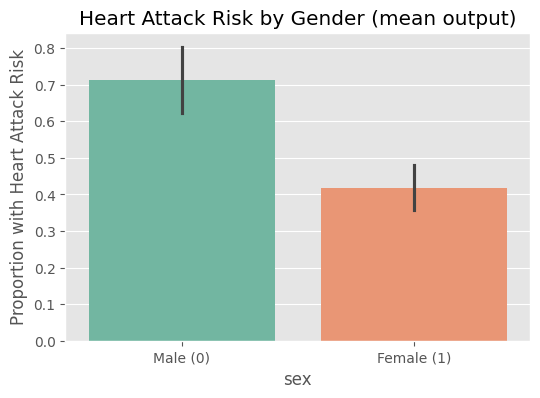

In [81]:
# write your code here for visuals/plots
plt.figure(figsize=(6,4))
sns.barplot(x='sex', y='output', data=data, palette="Set2")
plt.xticks([0,1], ['Male (0)','Female (1)'])
plt.title("Heart Attack Risk by Gender (mean output)")
plt.ylabel("Proportion with Heart Attack Risk")
plt.show()

**5.Patients with which type of chest pain are at highest risk of heart attack?**

Print with `Heart attack risk by chest pain type:`

In [83]:
# write your code here
risk_by_cp = data.groupby('cp')['output'].mean()
print("Heart attack risk by chest pain type: \n", risk_by_cp)

Heart attack risk by chest pain type: 
 cp
0    0.246835
1    0.788462
2    0.775281
3    0.640000
Name: output, dtype: float64


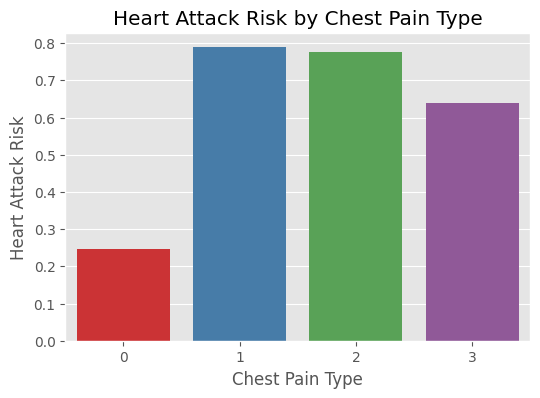

In [84]:
# write your code here for visuals/plots
plt.figure(figsize = (6, 4))
sns.barplot(x= risk_by_cp.index, y= risk_by_cp.values, palette="Set1")
plt.xlabel('Chest Pain Type')
plt.ylabel('Heart Attack Risk')
plt.title('Heart Attack Risk by Chest Pain Type')
plt.show()

---
---
**6.Analyse the effect of age on heart attack risk.**

In [49]:
# Mean ages for comparison
risk_by_age = data.groupby('output')['age'].mean()
print(risk_by_age)

output
0    56.616352
1    52.496970
Name: age, dtype: float64


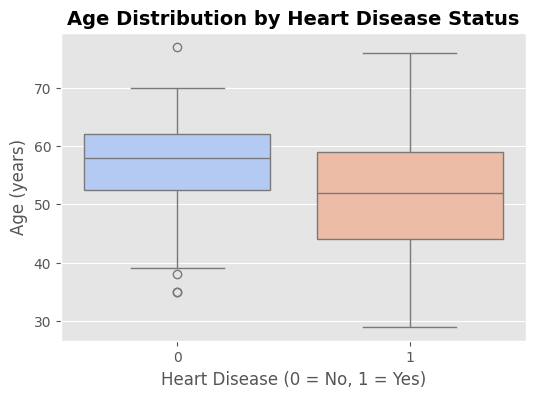

In [51]:
# Boxplot: Age Distribution by Heart Disease Status ---
plt.figure(figsize=(6,4))
sns.boxplot(x='output', y='age', data=data, palette='coolwarm')
plt.title('Age Distribution by Heart Disease Status', fontsize=14, weight='bold')
plt.xlabel('Heart Disease (0 = No, 1 = Yes)', fontsize=12)
plt.ylabel('Age (years)', fontsize=12)
plt.show()


---
---
**7. Does higher risk of `Heart attack risk by fasting blood sugar:` is associated more with low fasting blood sugar levels or high fasting blood sugar levels?**

In [85]:
# write your code here
risk_by_fbs = data.groupby('fbs')['output'].mean().sort_index()
print("Heart attack risk by fasting blood sugar:\n", risk_by_fbs)

Heart attack risk by fasting blood sugar:
 fbs
0    0.516364
1    0.469388
Name: output, dtype: float64


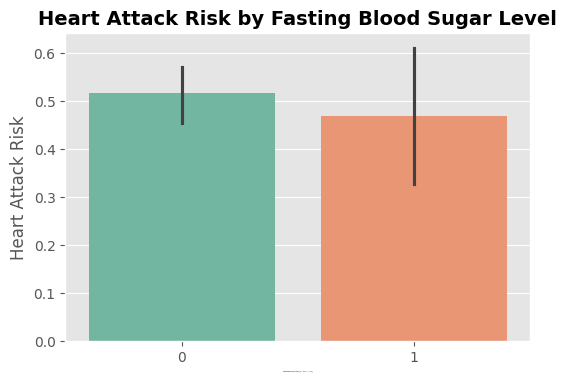

In [86]:
# write your code here for visuals/plots
plt.figure(figsize=(6,4))
sns.barplot(x='fbs', y='output', data=data, palette='Set2')
plt.title('Heart Attack Risk by Fasting Blood Sugar Level', fontsize=14, weight='bold')
plt.xlabel('Fasting Blood Sugar (0 = No, 1 = Yes)', fontsize=1, weight='bold')
plt.ylabel('Heart Attack Risk', fontsize=12)
plt.show()

---
---
**8. How the risk of `Heart attack risk by resting ECG results:`determined from resting electrocardiographic results?**

In [87]:
# write your code here
risk_by_ecg = data.groupby('restecg')['output'].mean().sort_index()
print("Heart attack risk by resting ECG results:\n", risk_by_ecg)

Heart attack risk by resting ECG results:
 restecg
0    0.441558
1    0.585366
2    0.166667
Name: output, dtype: float64


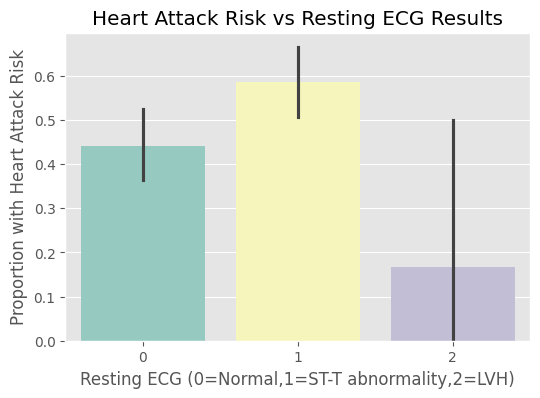

In [91]:
# write your code here for visuals/plots
plt.figure(figsize=(6,4))
sns.barplot(x='restecg', y='output', data=data, palette="Set3")
plt.title("Heart Attack Risk vs Resting ECG Results")
plt.ylabel("Proportion with Heart Attack Risk")
plt.xlabel("Resting ECG (0=Normal,1=ST-T abnormality,2=LVH)")
plt.show()

---
---
**9. Is resting blood presure a significant factor for determining risk of a heart attack?**


Print with `Mean blood pressure by risk:`

In [92]:
# write your code here
print("Mean blood pressure by risk:")
print(data.groupby('output')['trtbps'].mean())

Mean blood pressure by risk:
output
0    134.698113
1    129.303030
Name: trtbps, dtype: float64


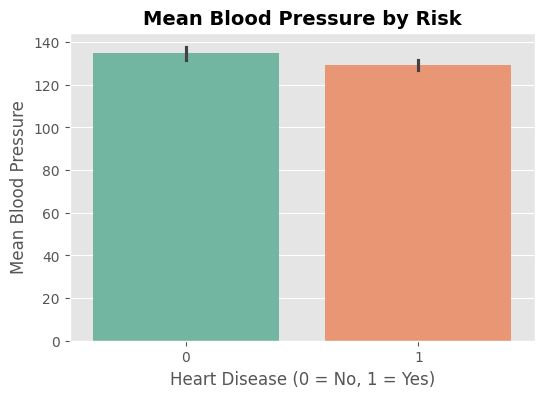

In [65]:
# write your code here for visuals/plots
plt.figure(figsize=(6,4))
sns.barplot(x='output', y='trtbps', data=data, palette='Set2')
plt.title('Mean Blood Pressure by Risk', fontsize=14, weight='bold')
plt.xlabel('Heart Disease (0 = No, 1 = Yes)', fontsize=12)
plt.ylabel('Mean Blood Pressure', fontsize=12)
plt.show()

---
---
**10.Is heart attack risk asociated with a higher heart rate?**

In [93]:
# write your code here
print("Mean heart rate by risk:")
print(data.groupby('output')['thalachh'].mean())

Mean heart rate by risk:
output
0    139.396226
1    158.414091
Name: thalachh, dtype: float64


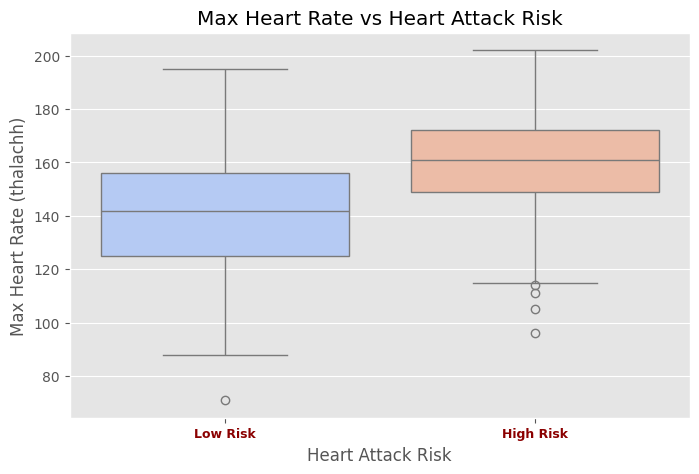

In [95]:
# write your code here for visuals/plots
plt.figure(figsize=(8,5))
ax = sns.boxplot(x='output', y='thalachh', data=data, palette="coolwarm")
plt.title("Max Heart Rate vs Heart Attack Risk")
plt.xlabel("Heart Attack Risk")
plt.ylabel("Max Heart Rate (thalachh)")

# Change x-axis tick labels to show Low and High Risk with color
ax.set_xticks([0, 1])
ax.set_xticklabels(['Low Risk', 'High Risk'], color='darkred', fontsize=9, fontweight='bold')

plt.show()

---
---
**11. Determine which ST/HR(ST segment and Heart rate ratio) slope value is associated with the highest risk of heart attack?**

In [96]:
# write your code here
risk_by_slp = data.groupby('slp')['output'].mean()
print("Heart attack risk by ST/HR slope:\n", risk_by_slp)

Heart attack risk by ST/HR slope:
 slp
0    0.391304
1    0.320261
2    0.722973
Name: output, dtype: float64


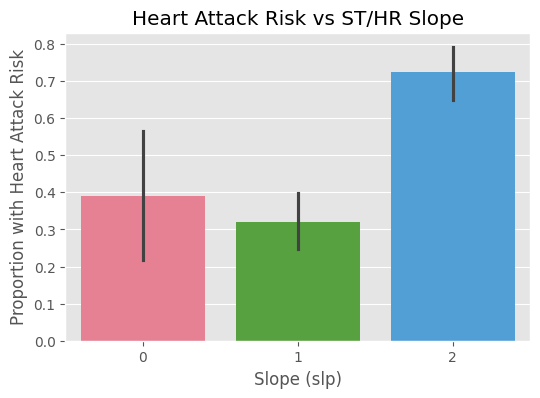

In [97]:
# write your code here for visuals/plots
plt.figure(figsize=(6,4))
sns.barplot(x='slp', y='output', data=data, palette="husl")
plt.title("Heart Attack Risk vs ST/HR Slope")
plt.xlabel("Slope (slp)")
plt.ylabel("Proportion with Heart Attack Risk")
plt.show()

## End!